In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import json
import random
import pickle
import os
import datetime
from Sampling import sample_graph, get_modified_at_array

In [2]:
def truncate_playlists(playlists):
    new_playlists = list()
    for playlist in playlists:
        new_playlist = list({'name': f"{i['artist_name']} - {i['track_name']}", 'track_uri': i['track_uri'][len("spotify:"):]} for i in playlist['tracks'])
        new_playlists.append(new_playlist)
        
    return new_playlists

In [3]:
#CHANGE THIS DEPENDING ON YOUR DATA LOCATION
path = "DATA/"

In [4]:
G, test_playlists = sample_graph(verbose=True, path=path, testSplit=True)

15/15; time elapsed: 0.0 min 18.2 sec
Time elapsed: 0.0 min  18.175447899999998 sec
n:323393, m:1006429; 


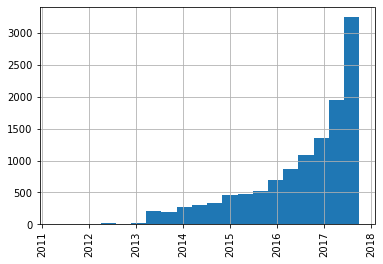

In [5]:
G_ser = get_modified_at_array(G,True)

In [6]:
len(test_playlists)

3000

In [7]:
#list({'name': f"{i['artist_name']} - {i['track_name']}", 'track_uri': i['track_uri'][len("spotify:"):]} for i in test_playlists[0]['tracks'])

In [8]:
test_playlists = truncate_playlists(test_playlists)

In [9]:
test_playlists[17]

[{'name': 'Elliott Smith - Speed Trials',
  'track_uri': 'track:4gRySBzWoWD2JqEFZnfPuX'},
 {'name': "A.A. Bondy - There's a Reason",
  'track_uri': 'track:7JE3S51FDlJlTExZ8ZtyNH'},
 {'name': 'Mark Kozelek - Carry Me Ohio',
  'track_uri': 'track:5WVoMUTYY6uDKYEzUXzkMx'},
 {'name': 'American Football - Never Meant',
  'track_uri': 'track:51R5mPcJjOnfv9lKY1u5sW'},
 {'name': 'Sparklehorse - Shade And Honey',
  'track_uri': 'track:33U6TXdRdHCp5TYXldWb8W'},
 {'name': "Big Troubles - You'll Be Laughing",
  'track_uri': 'track:1NhiVilsf8wreXm6mtD9kW'},
 {'name': 'Beach Fossils - Sleep Apnea',
  'track_uri': 'track:7H4AhGitjSmRZxKMaeH9wX'},
 {'name': 'Real Estate - Past Lives',
  'track_uri': 'track:4a5XE0MLRfMo7JmZFTxvR3'},
 {'name': 'A.A. Bondy - No Man Shall',
  'track_uri': 'track:43i4Gjjn3upz6WgIk8ynlR'},
 {'name': 'Cat Power - Metal Heart',
  'track_uri': 'track:4omnfKQRBPbu7XuFpjcj2l'},
 {'name': 'Radiohead - Talk Show Host',
  'track_uri': 'track:2sy0icOIskeP2lCqgZiTyE'},
 {'name': 'Wil

#### Random Walk method - proof of concept

In [10]:
from Algorithms import randWalkReccs

In [17]:
pd = random.sample(test_playlists[0],2)
personalization_vect = [i['track_uri'] for i in pd]

In [18]:
personalization_vect

['track:4gZOWIMzQnn8H2ENrs7UsW', 'track:1XRTXNP8eLpWXfso8Q4dC5']

In [38]:
start = timeit.default_timer()
num_iterations = 100*max(len(personalization_vect),10)
walk_steps = 12
results = randWalkReccs(G, num_iterations, walk_steps, personalization=personalization_vect)
stop = timeit.default_timer()
print('Time elapsed (minutes):', (stop - start)/60)  

Time elapsed (minutes): 0.000997423333332866


In [40]:
results

{'track:4gZOWIMzQnn8H2ENrs7UsW': 529,
 528996: 35,
 938539: 33,
 'track:5hYTyyh2odQKphUbMqc5gN': 3,
 'track:5DA77EqppDmCTWGovd4oTP': 12,
 37033: 2,
 'track:36JDWxV9Htu0znOlbhLn5C': 3,
 'album:7HVM870w6VP52qcDEbMftb': 1,
 720477: 2,
 'track:2EYuXHbbhNY1R8ORtWp6gl': 1,
 938003: 20,
 'track:2qsYkMBBRTqlSSifKTDM1F': 4,
 'album:6HA2YKWabsGi6XWkhWoZuA': 4,
 'track:41IcdEHjwDp65pVjOxODCf': 1,
 37937: 1,
 'track:5hc71nKsUgtwQ3z52KEKQk': 2,
 938844: 21,
 'track:4aWmUDTfIPGksMNLV2rQP2': 7,
 602547: 1,
 'track:6DUdDIRgLqCGq1DwkNWQTN': 3,
 650069: 1,
 'track:5W4vPDfwFNQqt7frRjL41t': 1,
 938477: 4,
 'track:0xMd5bcWTbyXS7wPrBtZA6': 3,
 800195: 1,
 'track:3VA8T3rNy5V24AXxNK5u9E': 1,
 999321: 1,
 'track:2uXRvXeGIK1tJ78AKXKcGG': 1,
 'track:1XRTXNP8eLpWXfso8Q4dC5': 527,
 684890: 135,
 'track:6vWF8gjFvGzKMaO0LfiSdr': 3,
 999369: 3,
 'track:5UZNhm49B9ZrunnSf96Nkc': 1,
 847606: 2,
 'track:6zpCJDhdpHPZCcFCJZDqX5': 2,
 847867: 1,
 'track:3lcuERI7leyYwfFGv1ZP5e': 1,
 528649: 5,
 'track:4bv3f4z27By49AbtqYO3mq'

In [39]:
rec_songs = filter(lambda x: str.startswith(str(x[0]), "track:"), results.items())
reccs = sorted(rec_songs, key=lambda x: x[1], reverse=True)
len(reccs)

3784

In [21]:
predicted_playlist = [{'name': f"{G.nodes[reccs[i][0]]['artist_name']} - {G.nodes[reccs[i][0]]['track_name']}",'track_uri':reccs[i][0]} for i in range(len(test_playlists[0])-2)]

In [27]:
predicted_playlist = [p for p in predicted_playlist if p['track_uri'] not in personalization_vect]

In [28]:
len(set(p['track_uri'] for p in predicted_playlist).intersection(set(p['track_uri'] for p in test_playlists[0])))/len(test_playlists[0])

0.010526315789473684

#### Actual test run

In [41]:
G, test_playlists = sample_graph(verbose=True, path=path, testSplit=True)
test_playlists = truncate_playlists(test_playlists)

15/15; time elapsed: 0.0 min 18.5 sec
Time elapsed: 0.0 min  18.496851099999958 sec
n:321319, m:999545; 


In [54]:
def evaluation_run(G,test_data,generator_function, different_starts = 1,persvec_lengths=4,walksteps=12,verbose=False):
    timer_start = timeit.default_timer()
    exceptions = 0
    global_counter = 0
    r_precisions = dict()
    
    assert min([len(i) for i in test_data]) > persvec_lengths, "This will be a problem. Some playlists are shorter than the personalization vector."
    
    for i in range(1,persvec_lengths+1):
        r_precisions[i] = list()
    
    for test_playlist in test_data:
        for persvec_length in range(1,persvec_lengths+1):
            for _ in range(different_starts):
                persvec = [track['track_uri'] for track in random.sample(test_playlist,persvec_length)]
                try:
                    res = generator_function(G, 100*max(len(persvec),10), walksteps, personalization=persvec)

                    rec_songs = filter(lambda x: str.startswith(str(x[0]), "track:"), res.items())
                    reccs = sorted(rec_songs, key=lambda x: x[1], reverse=True)

                    predicted_playlist = [reccs[i][0] for i in range(len(test_playlist)+persvec_length) if reccs[i][0] not in persvec]
                                        
                    r_precision = len(set(predicted_playlist).intersection(set(p['track_uri'] for p in test_playlist)))/(len(predicted_playlist))
                    r_precisions[persvec_length].append(r_precision)
                    
                    if verbose:
                        time_elapsed = timeit.default_timer() - timer_start
                        mins_elapsed = (time_elapsed)//60
                        secs_elapsed = time_elapsed % 60
                        print(f"{global_counter+exceptions+1}/{len(test_data)*persvec_lengths*different_starts}; time elapsed: {mins_elapsed:02.1f} min {secs_elapsed:02.1f} sec", end="\r")
                    
                    global_counter+=1
                except:
                    exceptions+=1
                    
    print(f"Number of exceptions (should be 0 in complete graph): {exceptions}")
    
    return r_precisions
    

In [55]:
statistics = evaluation_run(G, test_playlists, randWalkReccs, different_starts=1, persvec_lengths=4,verbose=True)

Number of exceptions (should be 0 in complete graph): 3445


In [56]:
[{'length of PV':t,'mean': np.mean(statistics[t]),'max': max(statistics[t]), 'std': np.std(statistics[t])} for t in statistics]

[{'length of PV': 1,
  'mean': 0.09459938824015657,
  'max': 0.8979591836734694,
  'std': 0.09491145221679431},
 {'length of PV': 2,
  'mean': 0.10441542415291936,
  'max': 0.8775510204081632,
  'std': 0.09510832311860173},
 {'length of PV': 3,
  'mean': 0.112810334726037,
  'max': 0.8367346938775511,
  'std': 0.0944673923128527},
 {'length of PV': 4,
  'mean': 0.12010125729035195,
  'max': 0.7959183673469388,
  'std': 0.10008495424359555}]

(array([985., 546., 320., 113.,  32.,  10.,   3.,   1.,   0.,   1.]),
 array([0.        , 0.0877551 , 0.1755102 , 0.26326531, 0.35102041,
        0.43877551, 0.52653061, 0.61428571, 0.70204082, 0.78979592,
        0.87755102]),
 <a list of 10 Patch objects>)

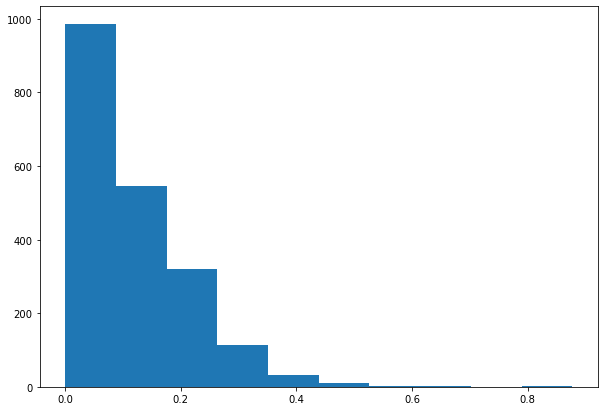

In [46]:
plt.figure(figsize=(10,7))
plt.hist(statistics[3])

(array([539., 599., 534., 371., 289., 254., 143., 124.,  98.,  72.]),
 array([  5. ,  29.4,  53.8,  78.2, 102.6, 127. , 151.4, 175.8, 200.2,
        224.6, 249. ]),
 <a list of 10 Patch objects>)

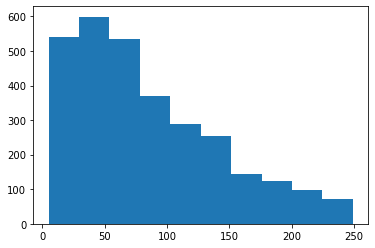

In [47]:
plt.hist([len(i) for i in test_playlists])
